In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Baltimore911_sample - Sheet1.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312.0,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333.0,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314.0,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [ ]:
#Function for columns and rows
df.shape

(1000, 16)

There are 1000 rows and 16 columns in the dataset.

In [ ]:
df.isnull().sum()

CrimeDate             0
CrimeTime             0
CrimeCode             0
Location              1
Description           0
Inside/Outside      167
Weapon              776
Post                  4
District              0
Neighborhood         76
Longitude             4
Latitude              4
Location 1         1000
Premise             167
vri_name1           863
Total Incidents       0
dtype: int64

In [ ]:
df.drop('Location 1', inplace=True, axis=1)
df.drop('vri_name1', inplace=True, axis=1)


In [ ]:
df.isnull().sum()


CrimeDate            0
CrimeTime            0
CrimeCode            0
Location             1
Description          0
Inside/Outside     167
Weapon             776
Post                 4
District             0
Neighborhood        76
Longitude            4
Latitude             4
Premise            167
Total Incidents      0
dtype: int64

In [ ]:
#Function to find numeric, real/ continuous or symbolic/discrete types of attributes or belong to temporal or spatial categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CrimeDate        1000 non-null   object 
 1   CrimeTime        1000 non-null   object 
 2   CrimeCode        1000 non-null   object 
 3   Location         999 non-null    object 
 4   Description      1000 non-null   object 
 5   Inside/Outside   833 non-null    object 
 6   Weapon           224 non-null    object 
 7   Post             996 non-null    float64
 8   District         1000 non-null   object 
 9   Neighborhood     924 non-null    object 
 10  Longitude        996 non-null    float64
 11  Latitude         996 non-null    float64
 12  Premise          833 non-null    object 
 13  Total Incidents  1000 non-null   int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 109.5+ KB


There is one column with numeric value, four columns with real values. CrimeTime belongs to temporal category and Longitude and Latitude belongs to spatial category.

- For the numeric column, although longitude, lattitude and post are classified as numeric but I am only considering "Total incidents" as numeric for finding the central tendencies and other measures.

In [ ]:
# Function for min, max, mean, median, and standard deviation
df[['Total Incidents']].describe()

,Total Incidents
count,1000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
# Converting columns to String
df[df.columns[df.dtypes=='object']].describe(include='all')

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,District,Neighborhood,Premise
count,1000,1000,1000,999,1000,833,224,1000,924,833
unique,11,419,43,840,13,4,4,10,195,51
top,02/01/2020,18:00:00,4E,2400 FREDERICK AVE,LARCENY,I,FIREARM,NORTHEAST,FRANKFORD,STREET
freq,110,25,195,6,212,415,110,137,28,310


In [ ]:
# Three attribute values with the largest count
a = df.nunique()
a.sort_values(ascending = False).head(3)

Longitude    886
Latitude     884
Location     840
dtype: int64

In [ ]:
#Function for the level of missingness
df.isna().sum() *100 / df.shape[0]

CrimeDate           0.0
CrimeTime           0.0
CrimeCode           0.0
Location            0.1
Description         0.0
Inside/Outside     16.7
Weapon             77.6
Post                0.4
District            0.0
Neighborhood        7.6
Longitude           0.4
Latitude            0.4
Premise            16.7
Total Incidents     0.0
dtype: float64

In [ ]:
df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'Total Incidents'],
      dtype='object')

In [ ]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

df['Year'] = df['CrimeDate'].dt.year

df['Month'] = df['CrimeDate'].dt.month_name()

df['Day_of_Week'] = df['CrimeDate'].dt.day_name()



In [ ]:
yearly_count = df.groupby(['Year']).size()
monthly_count = df.groupby(['Month']).size().sort_values()
day_of_week_count = df.groupby(['Day_of_Week']).size()


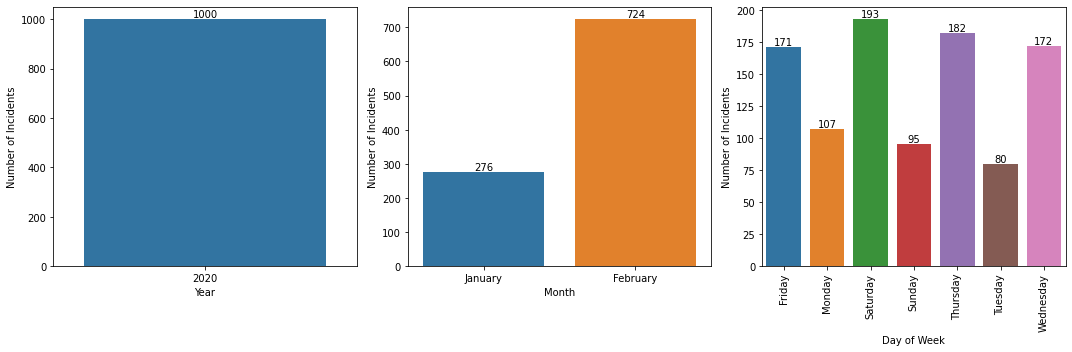

In [ ]:
# plot the results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x=yearly_count.index, y=yearly_count.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Year')
plt.ylabel('Number of Incidents')


plt.subplot(1,3,2)
ax = sns.barplot(x=monthly_count.index, y=monthly_count.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(2), ['January', 'February'])

plt.subplot(1,3,3)
ax = sns.barplot(x=day_of_week_count.index, y=day_of_week_count.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, )
plt.tight_layout()

plt.show()

In [ ]:
day_of_week_count.index.sort_values()

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='Day_of_Week')

In [ ]:
a = day_of_week_count = df.groupby(['Day_of_Week']).size()
a

Day_of_Week
Friday       171
Monday       107
Saturday     193
Sunday        95
Thursday     182
Tuesday       80
Wednesday    172
dtype: int64

In [ ]:
#Aggregate the data by crime type
data1 =df.groupby(['Description'])['CrimeDate'].count().reset_index()

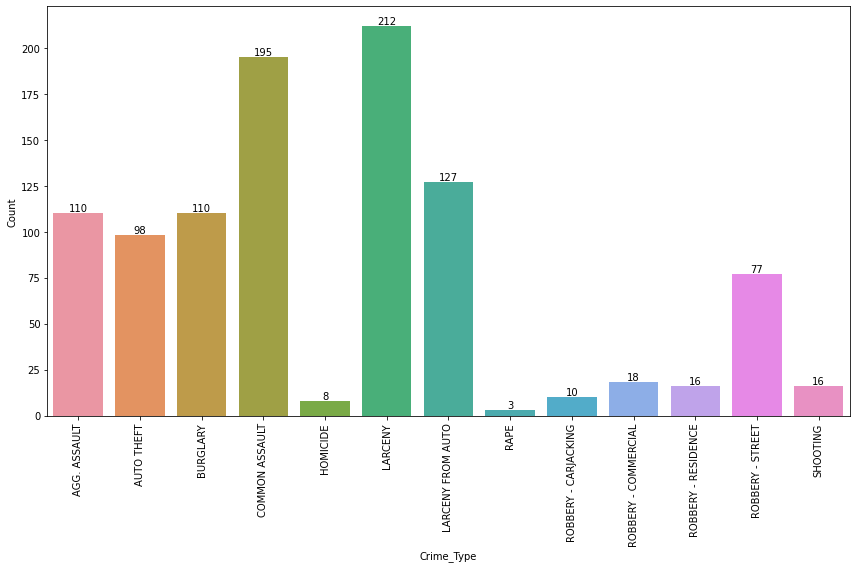

In [ ]:

# Create a bar chart of crime types and their corresponding counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=data1, x='Description', y='CrimeDate')
ax.bar_label(ax.containers[0])
plt.xlabel('Crime_Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df_crime_year=df.groupby(['Description','Year'])['CrimeDate'].count().reset_index()
df_crime_year.rename(columns={'Crime Date':'Count'},inplace=True)
df_crime_year["Crime_Type"] = df_crime_year["Description"] + "_" + df_crime_year["Year"].map(str)
df_crime_year

,Description,Year,CrimeDate,Crime_Type
0,AGG. ASSAULT,2020,110,AGG. ASSAULT_2020
1,AUTO THEFT,2020,98,AUTO THEFT_2020
2,BURGLARY,2020,110,BURGLARY_2020
3,COMMON ASSAULT,2020,195,COMMON ASSAULT_2020
4,HOMICIDE,2020,8,HOMICIDE_2020
5,LARCENY,2020,212,LARCENY_2020
6,LARCENY FROM AUTO,2020,127,LARCENY FROM AUTO_2020
7,RAPE,2020,3,RAPE_2020
8,ROBBERY - CARJACKING,2020,10,ROBBERY - CARJACKING_2020
9,ROBBERY - COMMERCIAL,2020,18,ROBBERY - COMMERCIAL_2020


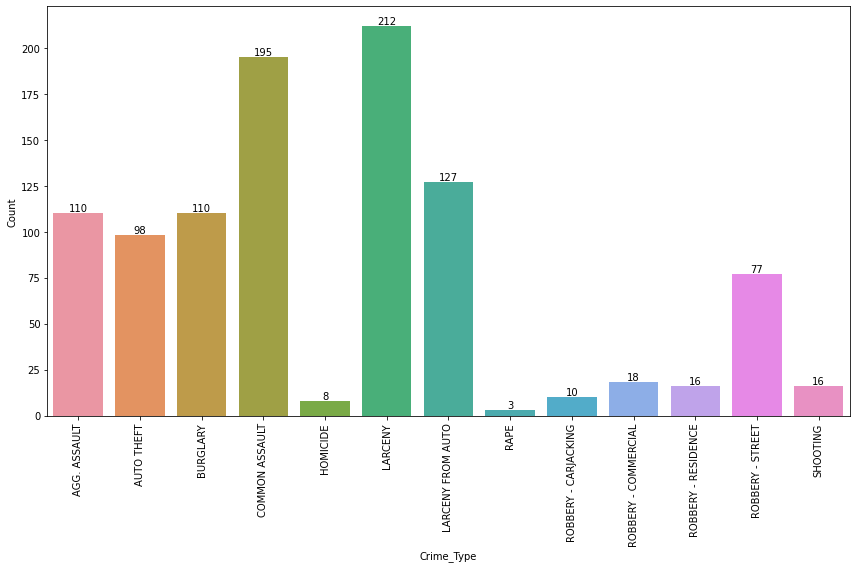

In [ ]:
# Create a bar chart of crime types and their corresponding counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=data1, x='Description', y='CrimeDate')
ax.bar_label(ax.containers[0])
plt.xlabel('Crime_Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df_crime_month=df.groupby(['Description','Month'])['CrimeDate'].count().reset_index()
df_crime_month.rename(columns={'CrimeDate':'Count'},inplace=True)
df_crime_month["Crime_Type"] = df_crime_month["Description"] + "_" + df_crime_month["Month"].map(str)
df_crime_month

,Description,Month,Count,Crime_Type
0,AGG. ASSAULT,February,84,AGG. ASSAULT_February
1,AGG. ASSAULT,January,26,AGG. ASSAULT_January
2,AUTO THEFT,February,73,AUTO THEFT_February
3,AUTO THEFT,January,25,AUTO THEFT_January
4,BURGLARY,February,74,BURGLARY_February
5,BURGLARY,January,36,BURGLARY_January
6,COMMON ASSAULT,February,142,COMMON ASSAULT_February
7,COMMON ASSAULT,January,53,COMMON ASSAULT_January
8,HOMICIDE,February,6,HOMICIDE_February
9,HOMICIDE,January,2,HOMICIDE_January


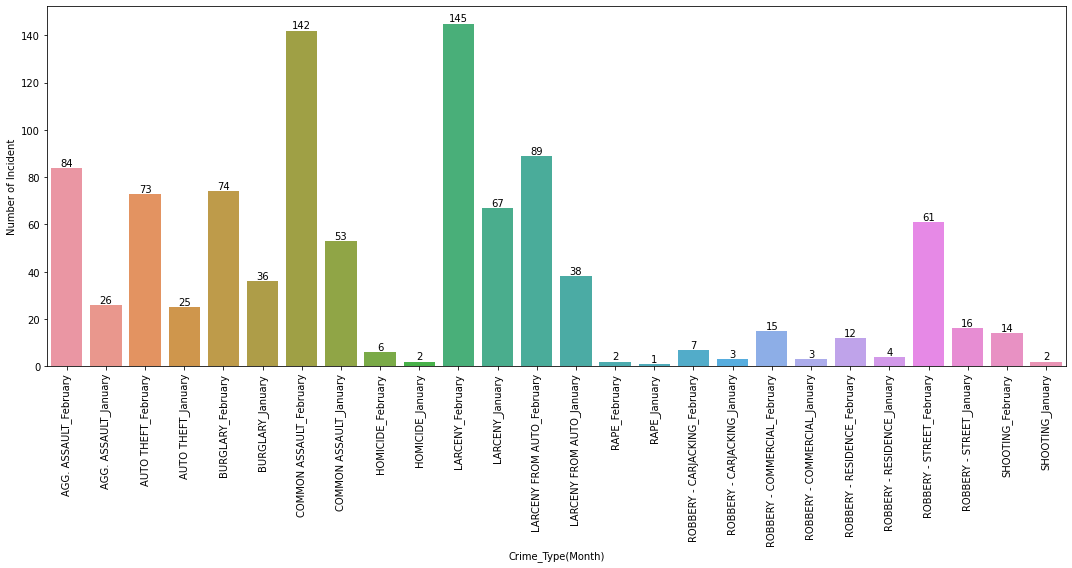

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_crime_month, x='Crime_Type', y='Count')
ax.bar_label(ax.containers[0])
plt.xlabel('Crime_Type(Month)')
plt.ylabel('Number of Incident')
plt.xticks(rotation=90, )
plt.tight_layout()

plt.show()

In [ ]:
df_crime_day=df.groupby(['Description','Day_of_Week'])['CrimeDate'].count().reset_index()
df_crime_day.rename(columns={'CrimeDate':'Count'},inplace=True)
df_crime_day["Crime_Type"] = df_crime_day["Description"] + "_" + df_crime_day["Day_of_Week"].map(str)
df_crime_day

,Description,Day_of_Week,Count,Crime_Type
0,AGG. ASSAULT,Friday,27,AGG. ASSAULT_Friday
1,AGG. ASSAULT,Monday,11,AGG. ASSAULT_Monday
2,AGG. ASSAULT,Saturday,25,AGG. ASSAULT_Saturday
3,AGG. ASSAULT,Sunday,12,AGG. ASSAULT_Sunday
4,AGG. ASSAULT,Thursday,17,AGG. ASSAULT_Thursday
...,...,...,...,...
76,SHOOTING,Friday,4,SHOOTING_Friday
77,SHOOTING,Monday,2,SHOOTING_Monday
78,SHOOTING,Saturday,7,SHOOTING_Saturday
79,SHOOTING,Sunday,1,SHOOTING_Sunday


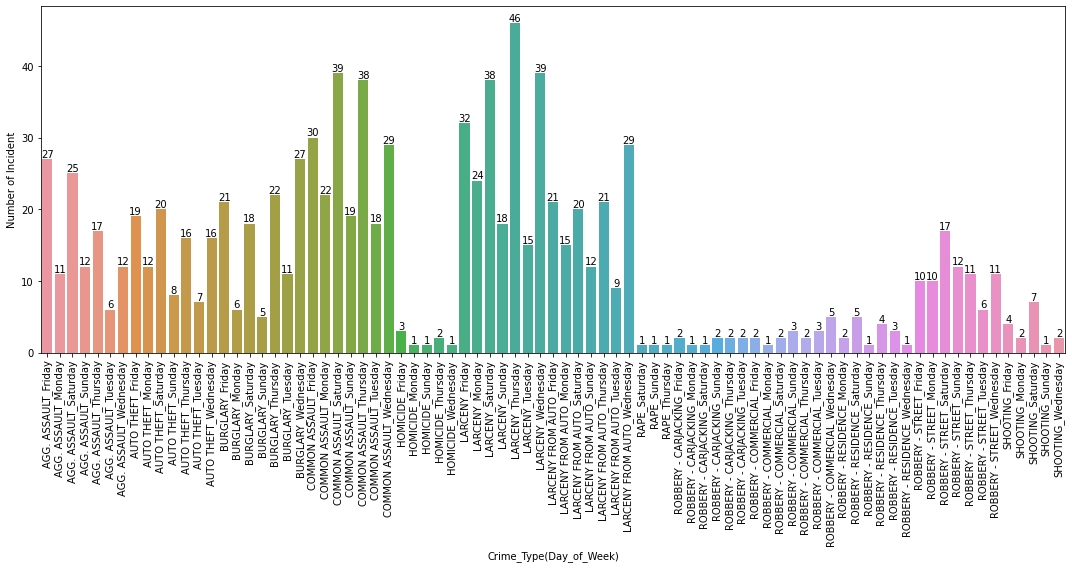

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_crime_day, x='Crime_Type', y='Count')
ax.bar_label(ax.containers[0])
plt.xlabel('Crime_Type(Day_of_Week)')
plt.ylabel('Number of Incident')
plt.xticks(rotation=90, )
plt.tight_layout()

plt.show()